This notebook was used to analyze the villages in Punjab and Haryana and select ~10,000 villages to obtain the data for.
The following steps were taken to get combined-dataset.csv:
1. Download data from the 42 districts for Punjab and Haryana.
2. Choose the colums 1-9 (meta data) and 16,17,20,21,50-55(inclusive),72,85,91,129,136,137,140 (feature columns) and   write the data in csv format. (we used unoconv (which comes with libreoffice) for this)
3. Remove Urban areas from the above csv files and concatenate them (by removing the appropriate header lines) into combined-dataset.csv (we used an awk script for this purpose)

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('/home/armaan/Desktop/censusHousingData/combined-dataset.csv', sep=",",header=None,index_col=False,dtype={0: str,2: str,4: str,6: str,7: str})
data.head(6)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,03,PUNJAB,035,Gurdaspur,00000,Gurdaspur,000000,0000,District - Gurdaspur,40.4,...,14.0,5.8,4.1,14.8,94.3,50.1,82.4,43.1,5.4,82.9
1,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,000000,0000,Sub-Dist - Dhar Kalan,41.1,...,10.8,6.4,4.4,79.1,94.0,25.9,73.5,28.8,3.5,65.2
2,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,000000,0000,Sub-Dist - Dhar Kalan,39.8,...,10.6,6.4,4.4,81.4,94.2,24.3,73.1,27.5,3.3,63.1
3,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027374,0000,Darbahn (406),18.4,...,5.8,2.9,1.9,79.6,91.3,2.9,62.1,7.8,4.9,31.1
4,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027375,0000,Darkua Bangla (405),45.7,...,6.2,2.5,0.0,100.0,88.9,18.5,81.5,24.7,7.4,43.2
5,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027376,0000,Sarti(404),38.2,...,11.0,5.8,4.0,77.2,92.9,8.0,66.5,20.1,2.7,38.1


In [3]:
ls_headings=['state-code', 'state-name', 'district-code', 'district-name', 'teh-code', 'teh-name', 'vill-code', 'ward-no', 'area-name', 'res_good', 'res_bad', 'res-other_good', 'res-other_bad', '1-room', '2-room', '3-room', '4-room', '5-room', '6-room', 'water_treated', 'lighting_electric', 'lat-facility', 'tv', 'bicycle', 'car', 'permanent-house']
data.columns


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64')

In [4]:
data.columns=ls_headings
data['census_id'] = data['state-code']+data['district-code']+data['teh-code']+data['vill-code']

Load data for Punjab and Haryana villages (23997 villages) into python, assign headers.
1-9 : meta data columns
10-26 : feature columns

In [5]:
data.head(5)

,state-code,state-name,district-code,district-name,teh-code,teh-name,vill-code,ward-no,area-name,res_good,...,5-room,6-room,water_treated,lighting_electric,lat-facility,tv,bicycle,car,permanent-house,census_id
0,03,PUNJAB,035,Gurdaspur,00000,Gurdaspur,000000,0000,District - Gurdaspur,40.4,...,5.8,4.1,14.8,94.3,50.1,82.4,43.1,5.4,82.9,0303500000000000
1,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,000000,0000,Sub-Dist - Dhar Kalan,41.1,...,6.4,4.4,79.1,94.0,25.9,73.5,28.8,3.5,65.2,0303500200000000
2,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,000000,0000,Sub-Dist - Dhar Kalan,39.8,...,6.4,4.4,81.4,94.2,24.3,73.1,27.5,3.3,63.1,0303500200000000
3,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027374,0000,Darbahn (406),18.4,...,2.9,1.9,79.6,91.3,2.9,62.1,7.8,4.9,31.1,0303500200027374
4,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027375,0000,Darkua Bangla (405),45.7,...,2.5,0.0,100.0,88.9,18.5,81.5,24.7,7.4,43.2,0303500200027375


In [6]:

data = data[data['vill-code'].astype(int)!=0] #Remove aggregate information
data.head(10)

,state-code,state-name,district-code,district-name,teh-code,teh-name,vill-code,ward-no,area-name,res_good,...,5-room,6-room,water_treated,lighting_electric,lat-facility,tv,bicycle,car,permanent-house,census_id
3,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027374,0000,Darbahn (406),18.4,...,2.9,1.9,79.6,91.3,2.9,62.1,7.8,4.9,31.1,0303500200027374
4,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027375,0000,Darkua Bangla (405),45.7,...,2.5,0.0,100.0,88.9,18.5,81.5,24.7,7.4,43.2,0303500200027375
5,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027376,0000,Sarti(404),38.2,...,5.8,4.0,77.2,92.9,8.0,66.5,20.1,2.7,38.1,0303500200027376
6,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027377,0000,Dukhan Iyali (407),21.1,...,6.5,3.3,96.7,96.7,18.7,73.2,17.9,2.4,26.8,0303500200027377
7,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027378,0000,Ghar (408),53.6,...,6.6,1.1,91.8,97.3,30.6,74.9,25.1,4.4,50.3,0303500200027378
8,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027379,0000,Barsudhal (409),15.4,...,5.3,3.0,87.0,90.5,4.1,56.2,13.0,1.8,28.4,0303500200027379
9,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027380,0000,Dunera (418),87.4,...,7.4,7.2,97.8,94.4,29.2,76.2,24.2,5.4,60.4,0303500200027380
10,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027381,0000,Bhamlada (410),37.3,...,8.1,5.2,98.2,96.1,18.4,76.9,21.0,3.7,53.0,0303500200027381
11,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027382,0000,Nalloh (411),23.0,...,4.7,3.1,85.3,91.9,12.6,64.7,24.3,3.9,54.5,0303500200027382
12,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027383,0000,Phangota (403),11.9,...,4.5,9.5,85.6,88.6,6.0,47.8,21.9,3.5,28.9,0303500200027383


In [7]:
data.shape

(18813, 27)

In [8]:
feature_columns = ls_headings[9:]
print feature_columns

['res_good', 'res_bad', 'res-other_good', 'res-other_bad', '1-room', '2-room', '3-room', '4-room', '5-room', '6-room', 'water_treated', 'lighting_electric', 'lat-facility', 'tv', 'bicycle', 'car', 'permanent-house']


In [9]:
data[feature_columns] = data[feature_columns].apply(lambda x: (x - x.mean()) / (np.std(x)))

Normalize feature columns to mean 0 variance 1.

In [10]:
data.head(3)

,state-code,state-name,district-code,district-name,teh-code,teh-name,vill-code,ward-no,area-name,res_good,...,5-room,6-room,water_treated,lighting_electric,lat-facility,tv,bicycle,car,permanent-house,census_id
3,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027374,0000,Darbahn (406),-1.097411,...,-0.596779,-0.562854,1.456049,-0.088172,-2.373310,-0.597918,-2.071684,-0.537198,-2.566691,0303500200027374
4,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027375,0000,Darkua Bangla (405),0.073994,...,-0.686728,-0.901907,2.082546,-0.295459,-1.738388,0.425156,-1.074167,-0.221272,-1.953774,0303500200027375
5,03,PUNJAB,035,Gurdaspur,00200,Dhar Kalan,027376,0000,Sarti(404),-0.247821,...,0.055348,-0.188110,1.382343,0.050019,-2.165740,-0.365881,-1.345680,-0.815213,-2.212111,0303500200027376


In [11]:
from sklearn import decomposition
pca2 = sklearn.decomposition.PCA(n_components=2, copy=True)
pca_full = sklearn.decomposition.PCA()

In [12]:
pca2.fit(data[feature_columns])

PCA(copy=True, n_components=2, whiten=False)

In [13]:
pca2.explained_variance_ratio_

array([ 0.27645046,  0.11465385])

Do PCA, keep top 2 principal components.

In [14]:
X = pca2.fit_transform(data[feature_columns])

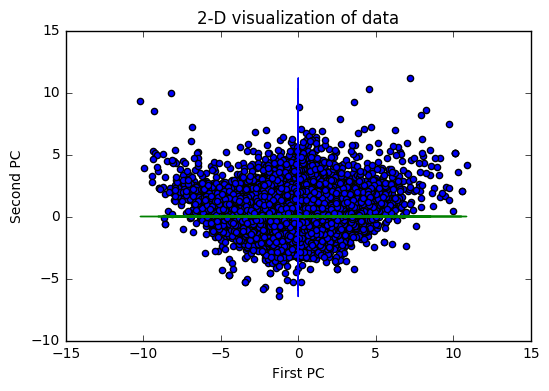

In [15]:
f = plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.plot(np.zeros(len(X)),X[:,1])
plt.plot(X[:,0],np.zeros(len(X)))
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.title('2-D visualization of data')

No clusters can be observed, a continuum of feature values for villages is observed. 
Next we'll do a 3D plot to see if this extends in 3 dimensions.

In [16]:
pca_full = sklearn.decomposition.PCA()
pca_full.fit(data[feature_columns])
print pca_full.explained_variance_ratio_
X_full = pca_full.fit_transform(data[feature_columns])

[ 0.27645046  0.11465385  0.09177598  0.08776025  0.06766682  0.06176158
  0.04766328  0.04456269  0.04038322  0.03759397  0.03208083  0.03081049
  0.02973065  0.02075651  0.01222359  0.00304743  0.00107839]


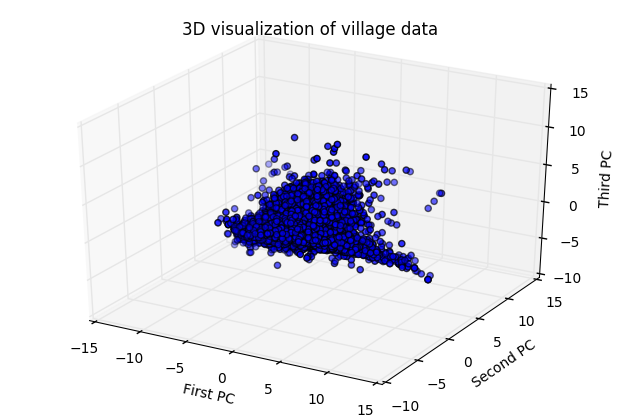

In [17]:
from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
import pylab
fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(X_full[:,0],X_full[:,1],X_full[:,2])
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
ax.set_zlabel('Third PC')
ax.set_title('3D visualization of village data')


As we can see, no clusters can be observed here too.
So now our aim is to use a samping strategy with the following properties :
-select villages with maximum variance, i.e. we want villages farther from the mean to have a higher probability of getting picked by our sampling algorithm.
-for this we will assign weights to each village proportional to it's distance from the centre point (for the first two principal components)

In [18]:
Y = np.array(data[feature_columns])
print Y

[[-1.09741127  1.71210307 -0.49537246 ..., -2.0716841  -0.53719836
  -2.56669089]
 [ 0.0739938   0.3414643  -0.49537246 ..., -1.07416669 -0.22127223
  -1.9537739 ]
 [-0.24782078  0.56677479 -0.42486495 ..., -1.3456803  -0.81521336
  -2.21211081]
 ..., 
 [-0.85283219  1.08780528 -0.45306795 ..., -0.86758024 -0.97949495
   0.73090384]
 [ 1.08663702 -1.30142462  0.09689057 ..., -0.31865054 -0.77730222
   0.84740872]
 [-0.01611428  0.40717986 -0.49537246 ...,  0.77330638  0.76441731
   0.82208157]]


In [19]:
np.var(Y,axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [20]:
distance_vec = np.sqrt(np.sum(Y*Y, axis=1))

In [21]:
sampledData = data.sample(n=10100, weights = distance_vec)
sampledData.shape
uniformlySampledData = data.sample(n=10100)

sampledData uses the above sampling strategy while uniformlySampledData uses uniform sampling (we will compare the results below)

In [22]:
sampledData.head(3)

,state-code,state-name,district-code,district-name,teh-code,teh-name,vill-code,ward-no,area-name,res_good,...,5-room,6-room,water_treated,lighting_electric,lat-facility,tv,bicycle,car,permanent-house,census_id
4318,03,PUNJAB,038,Hoshiarpur,00217,Garhshankar,031904,0000,Chak Soni (112),0.794858,...,-1.248907,-0.901907,-0.988520,0.663243,1.578673,1.400767,1.894776,-1.156414,0.923390,0303800217031904
6412,03,PUNJAB,042,Moga,00233,Moga,034018,0000,Dhurkot Charat Singh (48),-0.067605,...,0.032861,2.577854,0.752775,0.499141,0.491979,-0.154938,-0.200601,0.473765,0.705577,0304200233034018
14814,06,HARYANA,075,Panipat,00375,Panipat,059474,0000,Sarai Pilghan (14),-0.869996,...,-1.046523,-0.901907,1.839932,0.585510,1.187952,-0.539909,-1.133191,0.056743,0.923390,0607500375059474


In [23]:
X_new = pca_full.fit_transform(sampledData[feature_columns])
X_uniformly = pca_full.transform(uniformlySampledData[feature_columns])

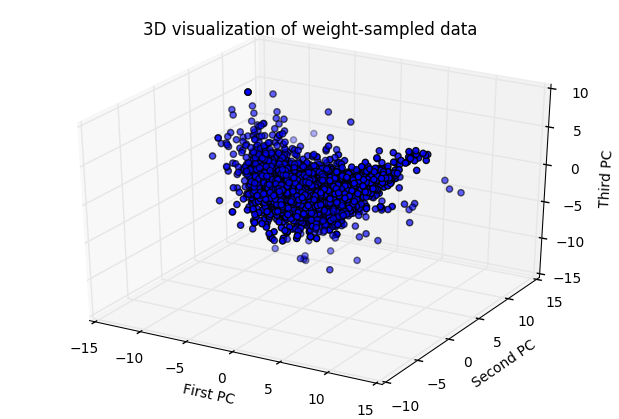

In [24]:
from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
import pylab
fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(X_new[:,0],X_new[:,1],X_new[:,2])
ax.set_xlabel('First PC')
ax.set_ylabel('Second PC')
ax.set_zlabel('Third PC')
ax.set_title('3D visualization of weight-sampled data')

Now let's compare the villages sampled by the 2 different sampling strategies.

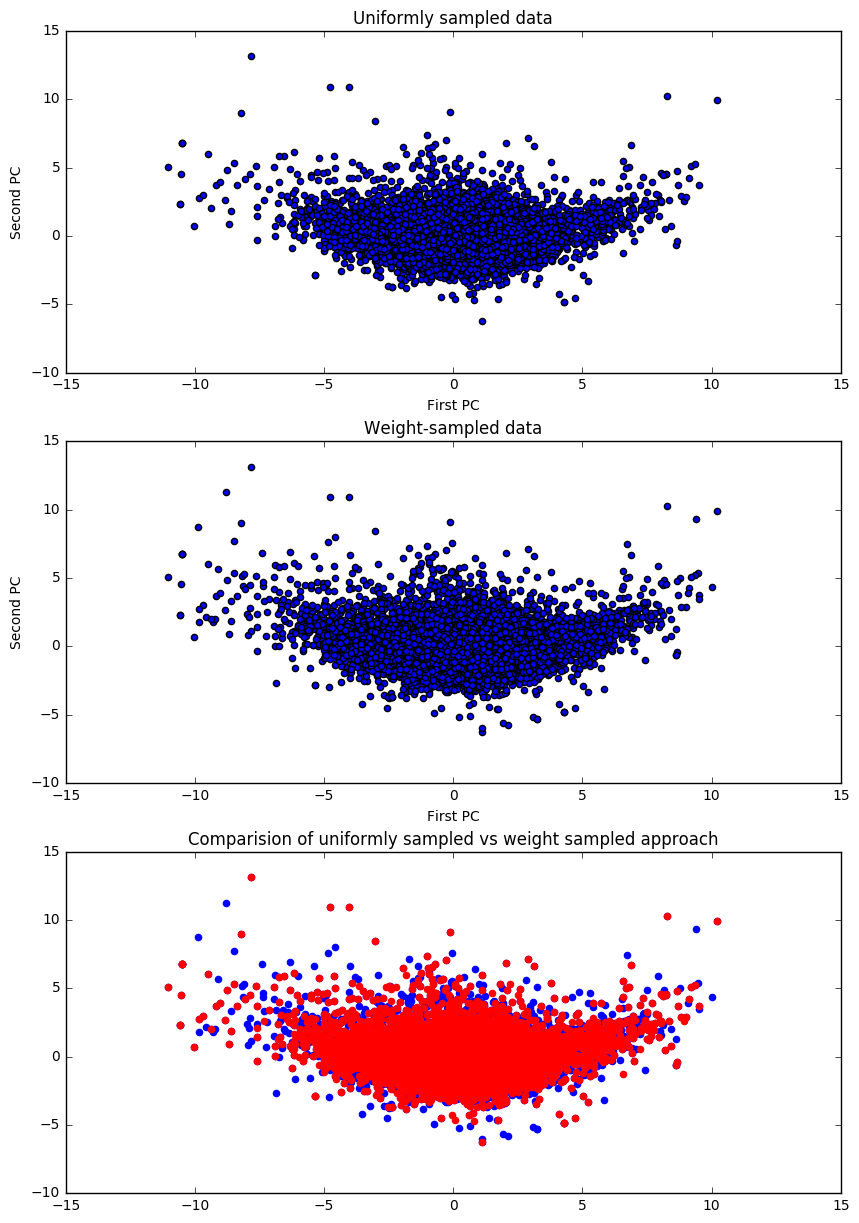

In [25]:
fig = plt.figure(figsize=(10,15))
ax1=fig.add_subplot(311)
ax1.scatter(X_uniformly[:,0], X_uniformly[:,1])
ax1.set_xlabel('First PC')
ax1.set_ylabel('Second PC')
ax1.set_title('Uniformly sampled data')
# ax1.set_xlim([-1,5])
# ax1.set_ylim([-1,2.5])
ax2=fig.add_subplot(312)
ax2.scatter(X_new[:,0], X_new[:,1])
ax2.set_xlabel('First PC')
ax2.set_ylabel('Second PC')
ax2.set_title('Weight-sampled data')
ax3=fig.add_subplot(313)
ax3.scatter(X_new[:,0], X_new[:,1], color='blue', label='Weight sampled')
ax3.scatter(X_uniformly[:,0], X_uniformly[:,1], color='red', label='Uniform sampled')
ax3.set_title('Comparision of uniformly sampled vs weight sampled approach')
# ax2.set_xlim([-1,5])
# ax2.set_ylim([-1,2.5])

In [26]:
sampledVillagesMetaData = sampledData.drop(feature_columns,axis=1)

In [27]:
sampledVillagesMetaData.head(3)

,state-code,state-name,district-code,district-name,teh-code,teh-name,vill-code,ward-no,area-name,census_id
4318,03,PUNJAB,038,Hoshiarpur,00217,Garhshankar,031904,0000,Chak Soni (112),0303800217031904
6412,03,PUNJAB,042,Moga,00233,Moga,034018,0000,Dhurkot Charat Singh (48),0304200233034018
14814,06,HARYANA,075,Panipat,00375,Panipat,059474,0000,Sarai Pilghan (14),0607500375059474


In [28]:
sampledVillagesMetaData.to_csv('/home/armaan/Desktop/selectedVillages.csv')